In [3]:
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm 
import numpy as np
import pandas as pd


In [26]:
## load the data
chl = xr.open_dataset('../data/chl_2000.nc')
optics = xr.open_dataset('../data/kd_zecchi_2000.nc')
SS_data = xr.open_dataset('../data/sst_sss_ssh_2000.nc')

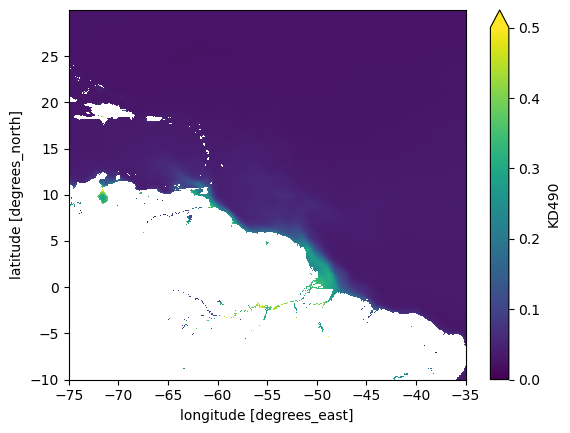

In [42]:
optics.mean(dim='time').KD490.plot(vmin=0, vmax=0.5)

### Seasonality

In [68]:
def seasonality(data):
    
    season = data.groupby('time.month').mean(dim='time')
    return season

def season_mean(data):

    ss = data['time'].dt.season
    ss_means = data.groupby(ss).mean('time')
    return ss_means

In [31]:
chl_season = seasonality(chl)
optics_season = seasonality(optics)
SS_season = seasonality(SS_data)

In [73]:
chl_mean = season_mean(chl)
optics_mean = season_mean(optics)
SS_mean = season_mean(SS_data)

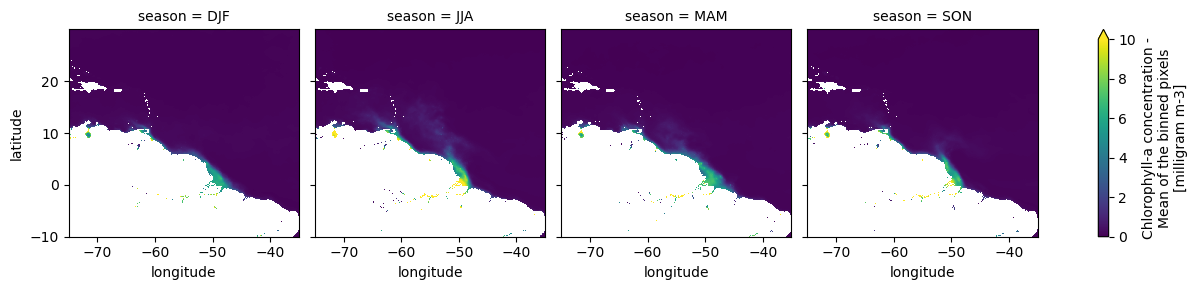

In [109]:
chl_mean.CHL.plot(col="season", col_wrap=4,vmin=0,vmax=10)

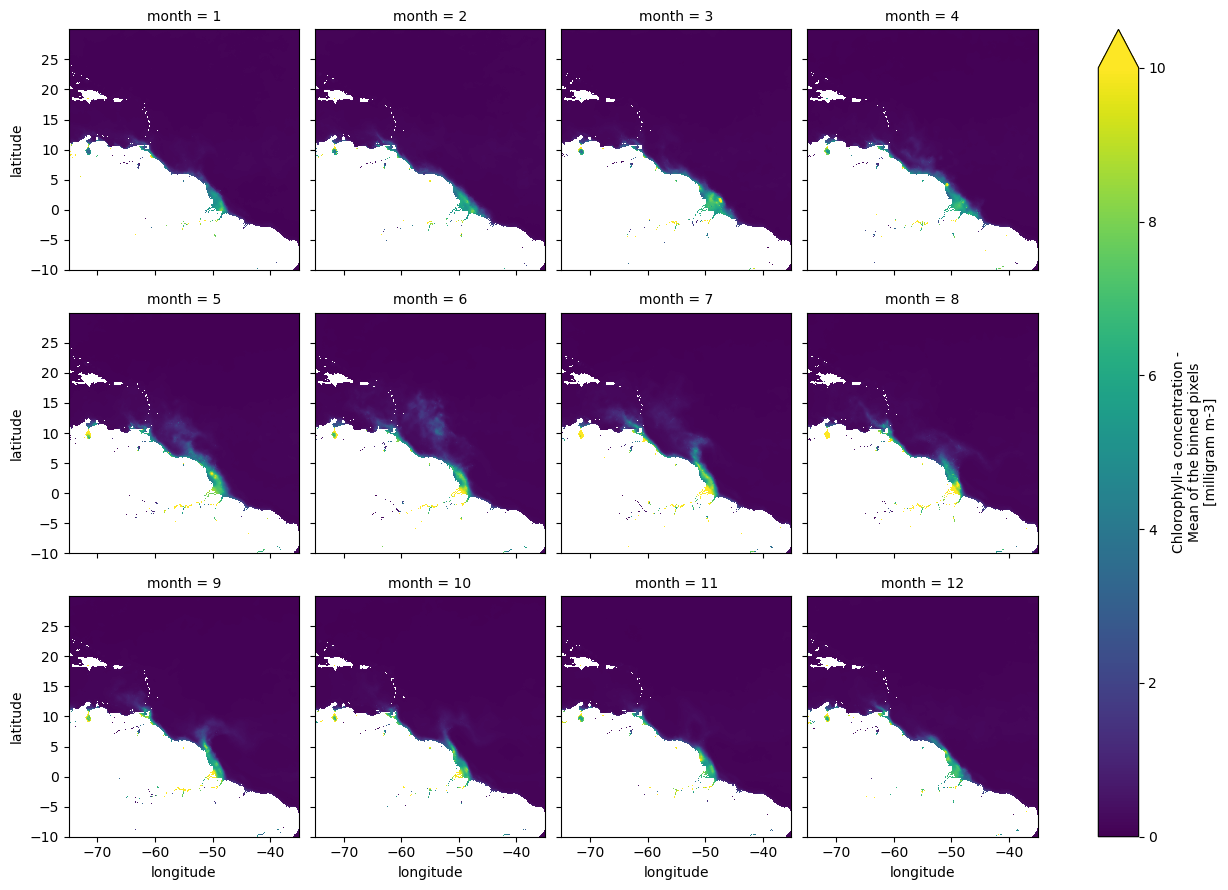

In [36]:
chl_season.CHL.plot(col="month", col_wrap=4,vmin=0,vmax=10)

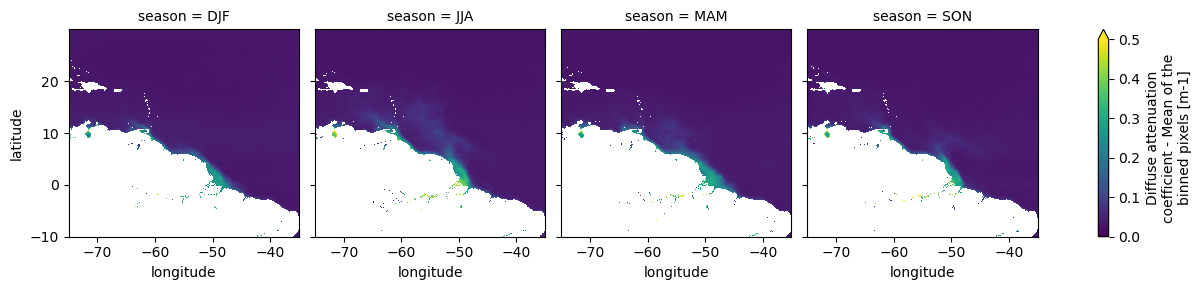

In [79]:
optics_mean.KD490.plot(col="season", col_wrap=4,vmin=0,vmax=0.5)
# title('KD 490nm')

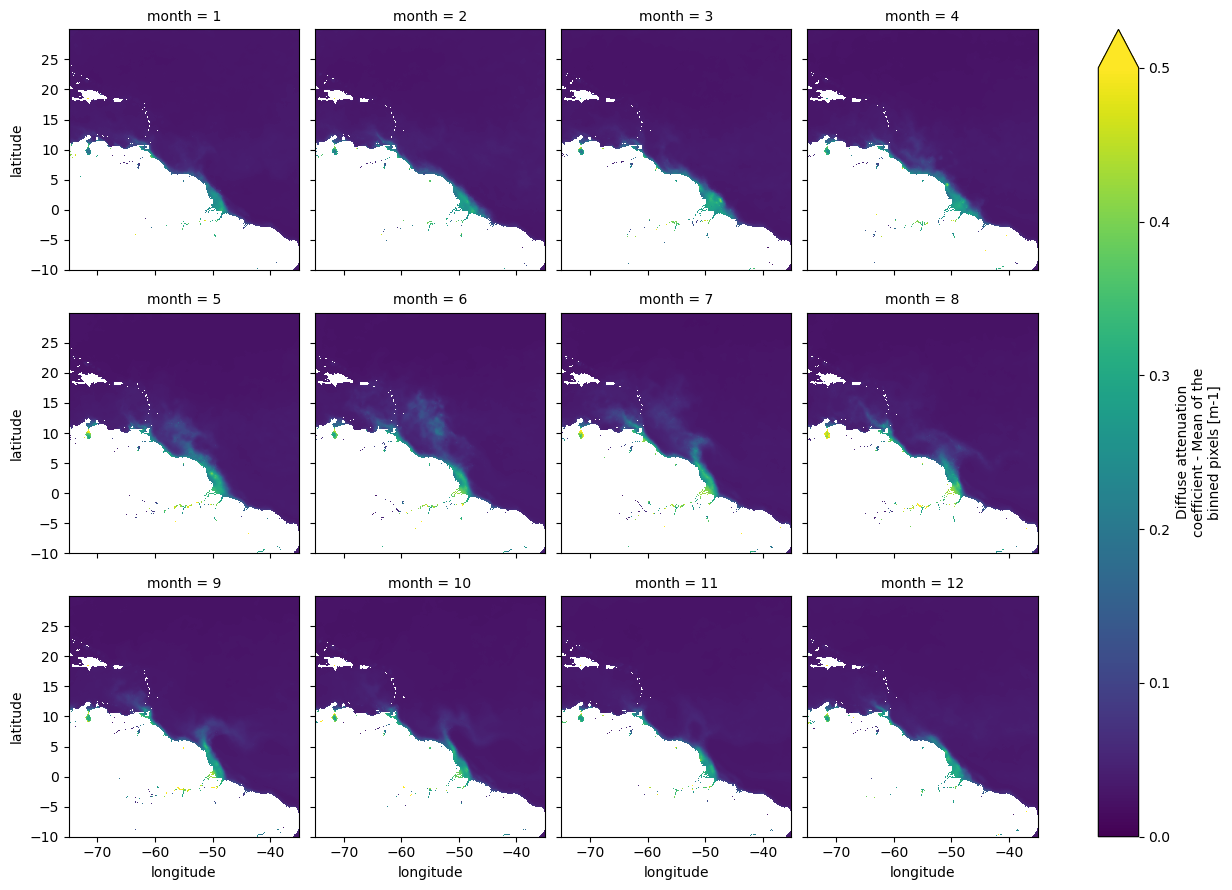

In [40]:
optics_season.KD490.plot(col="month", col_wrap=4,vmin=0, vmax=0.5)

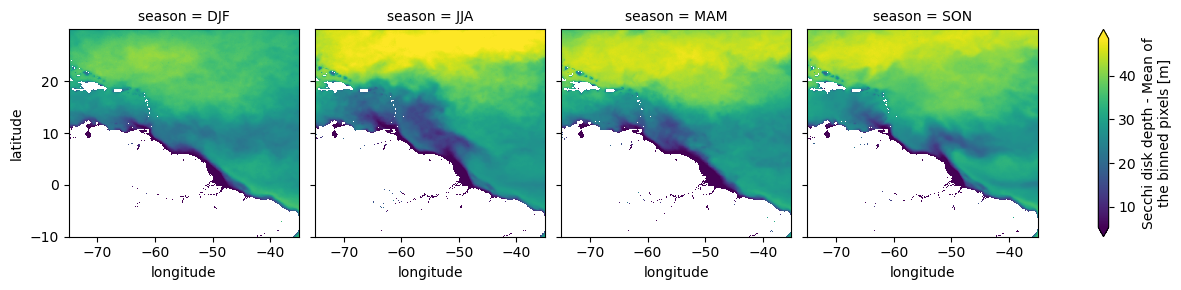

In [106]:
optics_mean.ZSD.plot(col="season", col_wrap=4, robust=True)

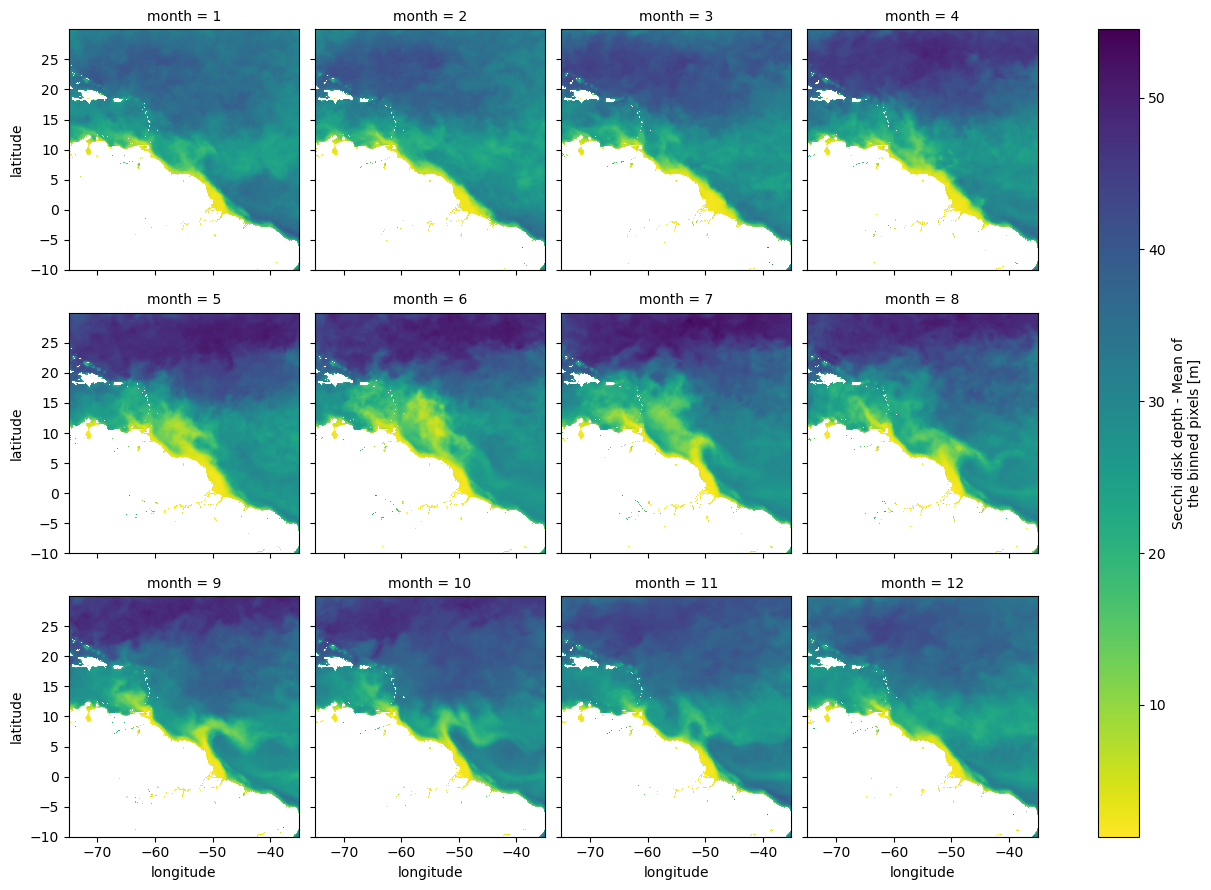

In [45]:
optics_season.ZSD.plot(col="month", col_wrap=4,cmap='viridis_r')

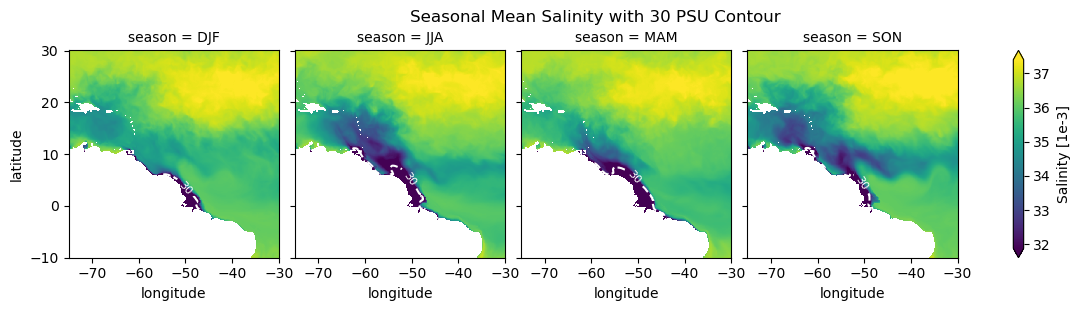

In [110]:
# SS_mean.so.plot(col="season", col_wrap=4)
# Plot the base salinity data
g = SS_mean.so.plot(col="season", col_wrap=4, robust=True, figsize=(12, 3))

# Add 30 psu contour lines to each subplot
for ax, season in zip(g.axs.flat, SS_mean.season.values):  # Use g.axs instead of g.axes
    # Select 2D data for this specific season
    season_data = SS_mean.so.sel(season=season)
    
    # Squeeze to ensure 2D (remove any singleton dimensions)
    contour_data = season_data.squeeze()
    
    # Plot contour
    cs = ax.contour(
        contour_data.longitude, 
        contour_data.latitude, 
        contour_data,
        levels=[30],
        colors='white',
        linewidths=1.5,
        linestyles='--'
    )
    # Optional: Add contour labels
    ax.clabel(cs, inline=True, fontsize=8, fmt='%.f')

# Adjust layout and add title
plt.suptitle("Seasonal Mean Salinity with 30 PSU Contour", y=1.02)
# plt.tight_layout()
plt.show()

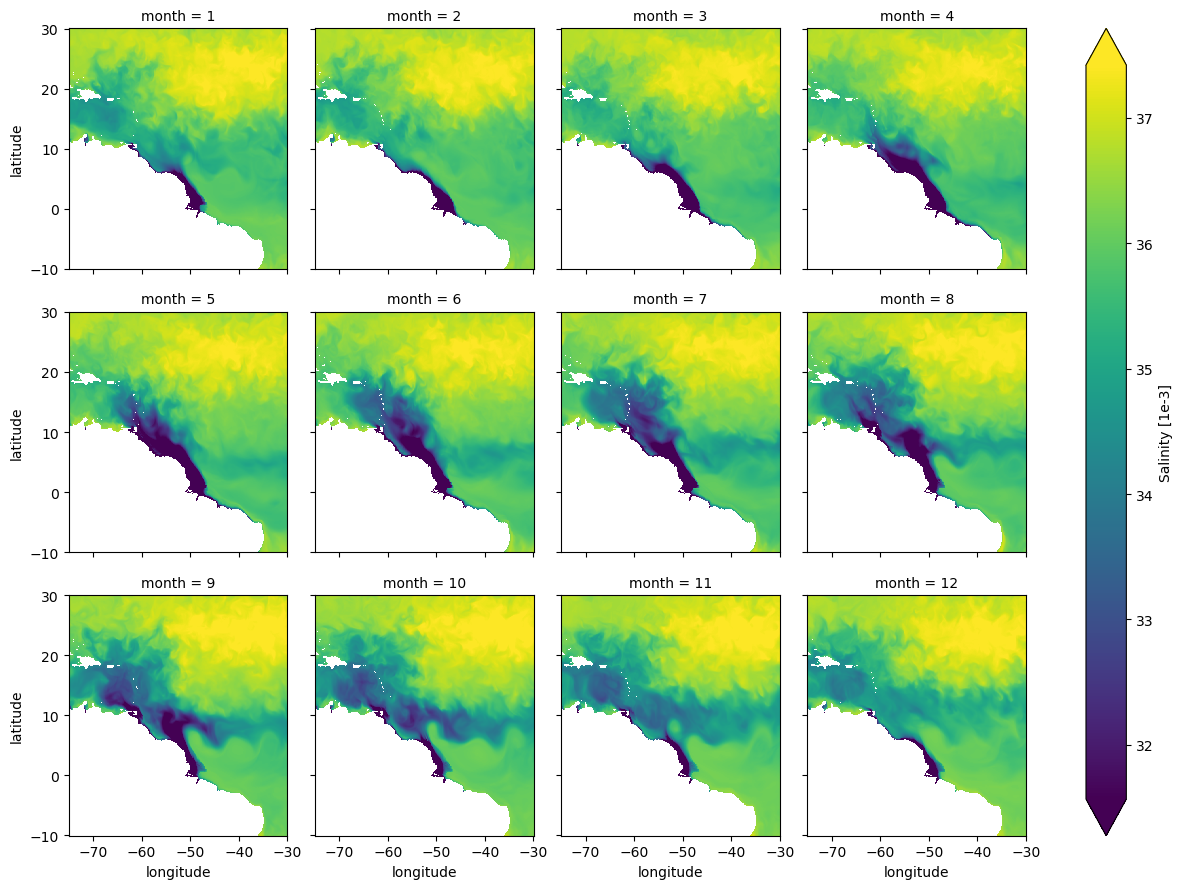

In [94]:
SS_season.so.plot(col="month", col_wrap=4,cmap='viridis',robust=True)

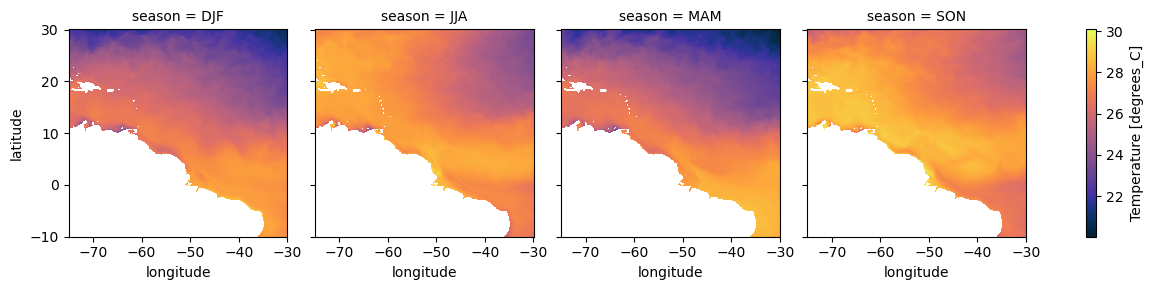

In [86]:
SS_mean.thetao.plot(col="season", col_wrap=4,cmap=cm.thermal)

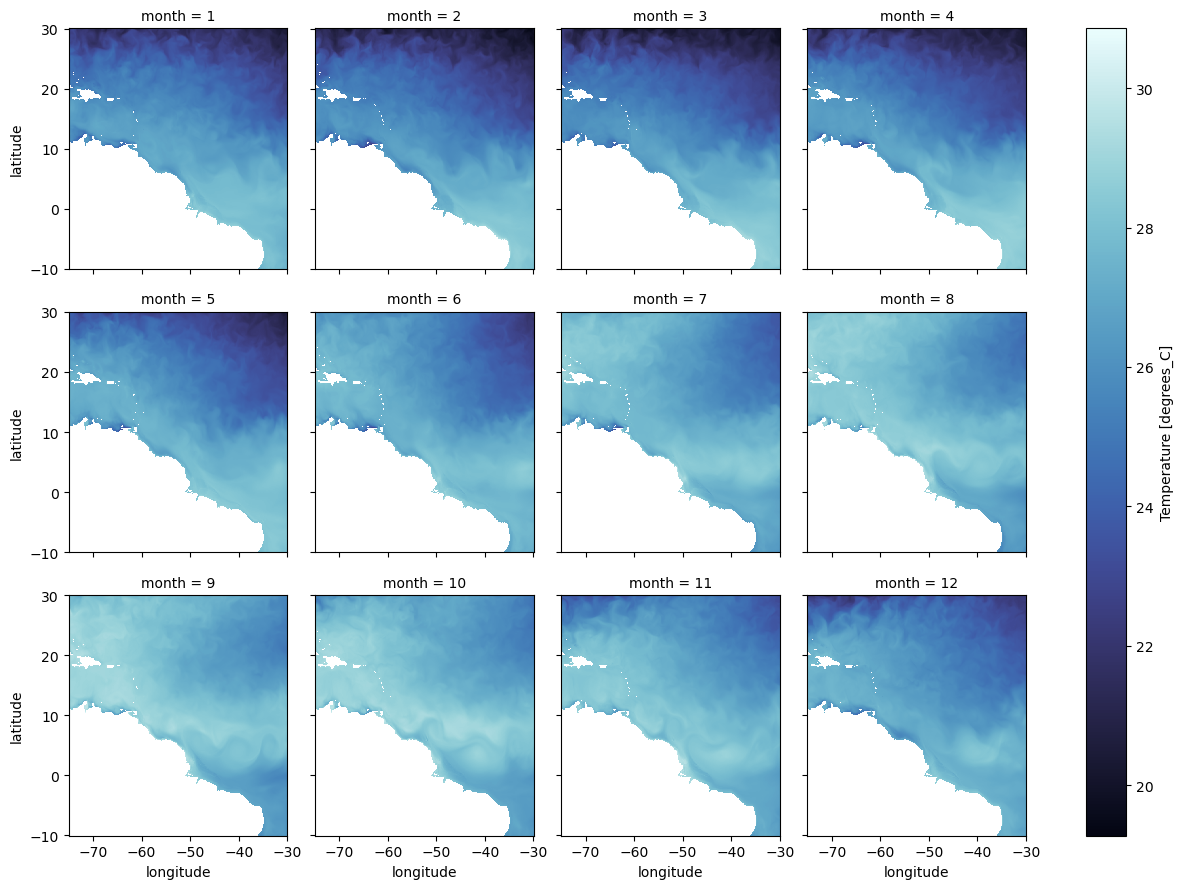

In [57]:
SS_season.thetao.plot(col="month", col_wrap=4,cmap=cm.ice)

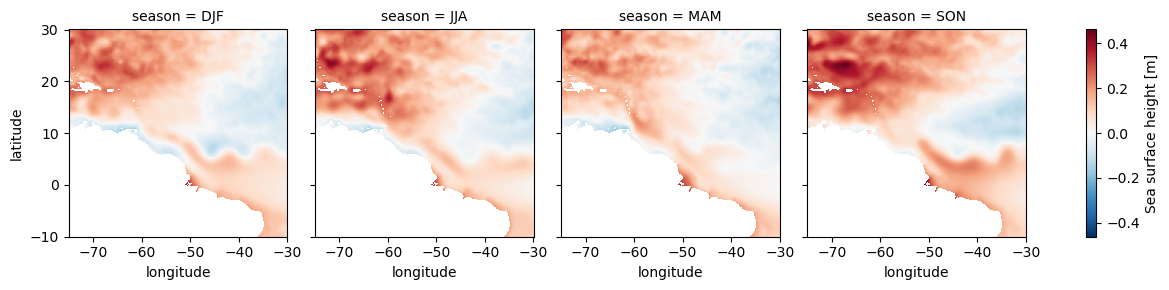

In [88]:
SS_mean.zos.plot(col="season", col_wrap=4)

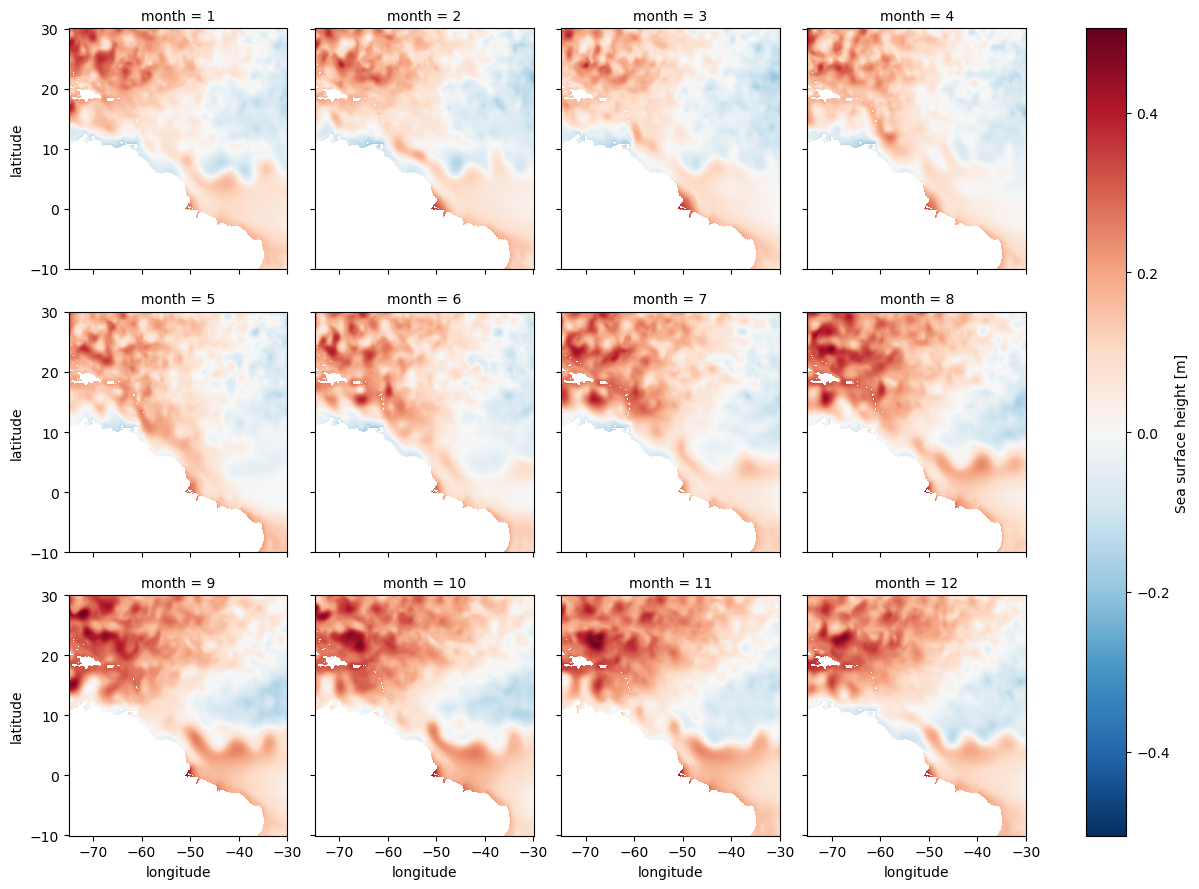

In [60]:
SS_season.zos.plot(col="month", col_wrap=4)

We will use only SSS, CHL, and optics to describe the plume
* I will start with the SSS and CHL, then KD and secci if needed